# 제16강: HuggingFace 데이터 활용

이번 실습에서는 HuggingFace의 `datasets` 라이브러리를 사용하여 한국어 데이터셋을 불러오고 분석하는 방법을 배운다.

## 학습 목표

1. HuggingFace datasets 라이브러리 사용법 익히기
2. NSMC 데이터셋 불러오기 (GitHub에서 직접 다운로드)
3. KLUE 벤치마크의 주요 태스크 탐색
4. 데이터 분석 및 시각화

## 1. 환경 설정

In [ ]:
# datasets 라이브러리 설치 (Codespace 전용)
%pip install datasets --break-system-packages -q


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


환경 설정 완료!
한글 폰트 경로: /workspaces/LDS2025/fonts/NotoSansCJKkr-Regular.otf
폰트 파일 존재: True


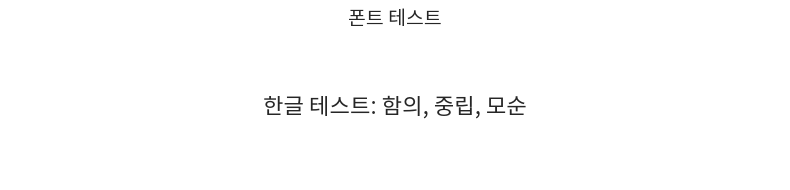


✓ 한글이 제대로 보이면 폰트 설정 성공!


In [28]:
# 필요한 라이브러리 임포트
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import os

# 한글 폰트 설정
font_path = os.path.abspath('../fonts/NotoSansCJKkr-Regular.otf')
fontprop = font_manager.FontProperties(fname=font_path)

# 전역으로 사용할 폰트 속성 저장
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("환경 설정 완료!")
print(f"한글 폰트 경로: {font_path}")
print(f"폰트 파일 존재: {os.path.exists(font_path)}")

# 한글 폰트 테스트
fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, '한글 테스트: 함의, 중립, 모순', 
        ha='center', va='center', fontsize=16, fontproperties=fontprop)
ax.set_title('폰트 테스트', fontproperties=fontprop, fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()
print("\n✓ 한글이 제대로 보이면 폰트 설정 성공!")

## 2. NSMC 데이터셋 불러오기

10강에서 다룬 네이버 영화 감정 분석 데이터셋을 다시 살펴보자.

### 📌 HuggingFace vs GitHub 직접 다운로드

NSMC는 오래된 데이터셋으로 HuggingFace의 최신 정책과 호환되지 않는다. 대신 원본 GitHub 저장소에서 직접 데이터를 불러올 수 있다.

- ✅ **장점**: 항상 최신 데이터, 안정적
- ⚠️ **단점**: HuggingFace의 편리한 기능(캐싱, split 등)을 사용할 수 없음

In [29]:
# NSMC 데이터셋을 GitHub에서 직접 불러오기
print("NSMC 데이터셋 다운로드 중...")

train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

# Pandas로 직접 로딩
df_nsmc_train = pd.read_csv(train_url, sep='\t')
df_nsmc_test = pd.read_csv(test_url, sep='\t')

print("\n다운로드 완료!")
print(f"학습 데이터: {len(df_nsmc_train):,}개")
print(f"테스트 데이터: {len(df_nsmc_test):,}개")

NSMC 데이터셋 다운로드 중...

다운로드 완료!
학습 데이터: 150,000개
테스트 데이터: 50,000개


### 2.1 데이터 구조 살펴보기

In [30]:
# 학습 데이터 정보
print("학습 데이터 정보:")
print(df_nsmc_train.info())
print()

# 컬럼 확인
print("컬럼:", df_nsmc_train.columns.tolist())

학습 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None

컬럼: ['id', 'document', 'label']


In [31]:
# 처음 5개 리뷰 보기
print("처음 5개 리뷰:")
df_nsmc_train.head()

처음 5개 리뷰:


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 2.2 기본 통계 확인

In [32]:
# 기본 통계 정보
print("기본 통계:")
print(df_nsmc_train.describe())

기본 통계:
                 id          label
count  1.500000e+05  150000.000000
mean   6.743533e+06       0.498847
std    2.919051e+06       0.500000
min    3.300000e+01       0.000000
25%    4.766881e+06       0.000000
50%    7.526840e+06       0.000000
75%    9.249435e+06       1.000000
max    1.027815e+07       1.000000


In [33]:
# 레이블 분포 확인
print("레이블 분포:")
print(df_nsmc_train['label'].value_counts())
print()

# 비율 계산
label_ratio = df_nsmc_train['label'].value_counts(normalize=True)
print("레이블 비율:")
print(label_ratio)

레이블 분포:
label
0    75173
1    74827
Name: count, dtype: int64

레이블 비율:
label
0    0.501153
1    0.498847
Name: proportion, dtype: float64


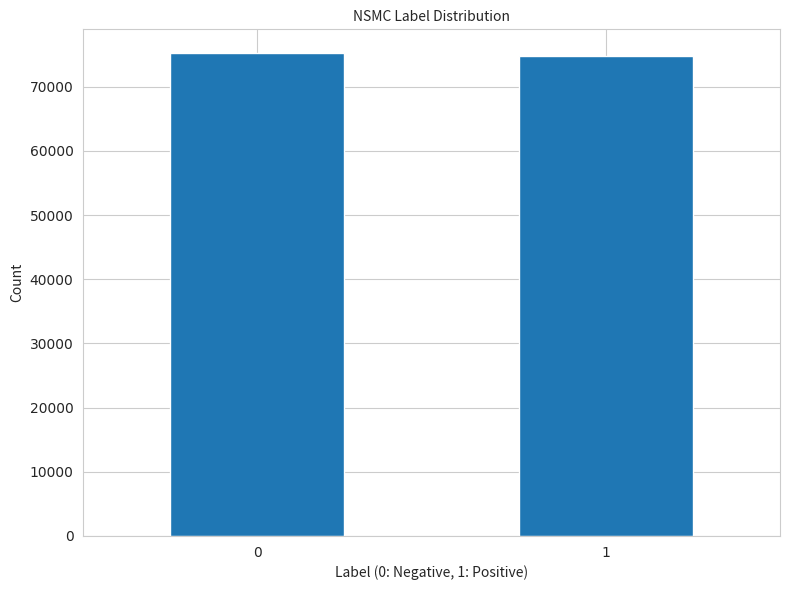

In [34]:
# 레이블 분포 시각화
plt.figure(figsize=(8, 6))
df_nsmc_train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label (0: Negative, 1: Positive)', fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.title('NSMC Label Distribution', fontproperties=fontprop)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. KLUE 벤치마크 탐색

KLUE(Korean Language Understanding Evaluation)는 한국어 자연어 이해 능력을 평가하기 위한 8가지 태스크로 구성된 벤치마크이다.

KLUE는 최신 HuggingFace 형식을 지원하므로 `DatasetDict` 구조로 제공된다.

### 3.1 KLUE-STS (의미적 텍스트 유사도)

In [35]:
# KLUE-STS 불러오기
print("KLUE-STS 다운로드 중...")
sts = load_dataset("klue", name="sts")
print("\n다운로드 완료!")
print(sts)

KLUE-STS 다운로드 중...

다운로드 완료!
DatasetDict({
    train: Dataset({
        features: ['guid', 'source', 'sentence1', 'sentence2', 'labels'],
        num_rows: 11668
    })
    validation: Dataset({
        features: ['guid', 'source', 'sentence1', 'sentence2', 'labels'],
        num_rows: 519
    })
})


In [36]:
# 첫 번째 예제 살펴보기
print("KLUE-STS 첫 번째 예제:")
example = sts["train"][0]
print(f"문장 1: {example['sentence1']}")
print(f"문장 2: {example['sentence2']}")
print(f"유사도 점수: {example['labels']['label']}")
print(f"이진 레이블: {example['labels']['binary-label']}")
print(f"출처: {example['source']}")

KLUE-STS 첫 번째 예제:
문장 1: 숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.
문장 2: 숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.
유사도 점수: 3.7
이진 레이블: 1
출처: airbnb-rtt


In [37]:
# 여러 예제 살펴보기
print("\n다양한 유사도 점수 예제:")
for i in range(5):
    example = sts["train"][i * 2000]
    score = example['labels']['label']
    print(f"\n[점수: {score:.1f}]")
    print(f"  문장1: {example['sentence1']}")
    print(f"  문장2: {example['sentence2']}")


다양한 유사도 점수 예제:

[점수: 3.7]
  문장1: 숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.
  문장2: 숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.

[점수: 3.2]
  문장1: 우리 가족이 원하던 집이기에 더없이 행복한 여행이였습니다.
  문장2: 저희 가족은 지내기에 매우 행복한 시간 이였습니다.

[점수: 0.4]
  문장1: 집안 실내 온도 측정은 어떤 방법으로 해야 되는거야?
  문장2: 다음달까지 기다리지말고 이번달 안에 보일러 점검 받아야 하지 않을까?

[점수: 0.2]
  문장1: 평가 결과 매우우수(A등급, 20%) 34곳, 우수(B등급, 30%) 50곳, 보통(C등급, 30%) 49곳, 미흡(D등급, 20%) 34곳으로 나타났다.
  문장2: 이어 이탈리아(9.9%), 인도(9.5%), 미국(7.9), 폴란드(6.6%), 아랍에미리트연합(4.3%) 순으로 나타났다.

[점수: 0.0]
  문장1: 페인트나 바닥, 기자재들이 모두 새로이 구비된거 같았습니다.
  문장2: 한국인들이 많이 방문하는것 같았습니다.


### 3.2 데이터 분석 준비

In [38]:
# DataFrame으로 변환
df_sts = sts["train"].to_pandas()

print("DataFrame 크기:", df_sts.shape)
print("\nDataFrame 정보:")
print(df_sts.info())

DataFrame 크기: (11668, 5)

DataFrame 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11668 entries, 0 to 11667
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   guid       11668 non-null  object
 1   source     11668 non-null  object
 2   sentence1  11668 non-null  object
 3   sentence2  11668 non-null  object
 4   labels     11668 non-null  object
dtypes: object(5)
memory usage: 455.9+ KB
None


In [39]:
# labels 딕셔너리에서 값 추출
df_sts['score'] = df_sts['labels'].apply(lambda x: x['label'])
df_sts['binary'] = df_sts['labels'].apply(lambda x: x['binary-label'])

# 필요한 컬럼만 선택
df_sts_clean = df_sts[['sentence1', 'sentence2', 'score', 'binary', 'source']]

print("정제된 DataFrame:")
print(df_sts_clean.head())

정제된 DataFrame:
                                           sentence1  \
0                   숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.   
1      위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.   
2            회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.   
3  긴급 고용안정지원금은 지역고용대응 등 특별지원금, 지자체별 소상공인 지원사업, 취업...   
4                        호스트의 답장이 늦으나, 개선될 것으로 보입니다.   

                                    sentence2  score  binary           source  
0  숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.    3.7       1       airbnb-rtt  
1       시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.    0.0       0   policy-sampled  
2                  사람들이 주로 네이버 메일을 쓰는 이유를 알려줘    0.3       0  paraKQC-sampled  
3   고용보험이 1차 고용안전망이라면, 국민취업지원제도는 2차 고용안전망입니다.    0.6       0   policy-sampled  
4                  호스트 응답이 늦었지만 개선될 것으로 보입니다.    4.7       1       airbnb-rtt  


### 3.3 유사도 점수 분포 분석

In [40]:
# 기본 통계량
print("유사도 점수 통계:")
print(df_sts_clean['score'].describe())
print()

# 이진 레이블 분포
print("이진 레이블 분포:")
print(df_sts_clean['binary'].value_counts())
print()
print("비율:")
print(df_sts_clean['binary'].value_counts(normalize=True))

유사도 점수 통계:
count    11668.000000
mean         2.216138
std          1.750278
min          0.000000
25%          0.200000
50%          2.700000
75%          3.900000
max          5.000000
Name: score, dtype: float64

이진 레이블 분포:
binary
0    6066
1    5602
Name: count, dtype: int64

비율:
binary
0    0.519883
1    0.480117
Name: proportion, dtype: float64


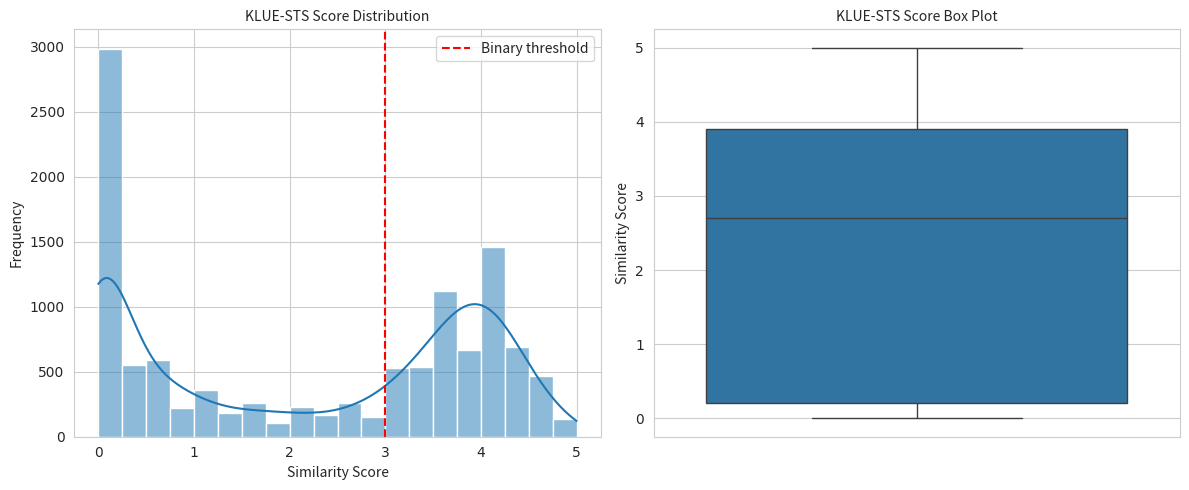

In [41]:
# 유사도 점수 분포 시각화
plt.figure(figsize=(12, 5))

# 히스토그램 + KDE
plt.subplot(1, 2, 1)
sns.histplot(data=df_sts_clean, x='score', bins=20, kde=True)
plt.xlabel('Similarity Score', fontproperties=fontprop)
plt.ylabel('Frequency', fontproperties=fontprop)
plt.title('KLUE-STS Score Distribution', fontproperties=fontprop)
plt.axvline(x=3.0, color='red', linestyle='--', label='Binary threshold')
plt.legend(prop=fontprop)

# 박스 플롯
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sts_clean, y='score')
plt.ylabel('Similarity Score', fontproperties=fontprop)
plt.title('KLUE-STS Score Box Plot', fontproperties=fontprop)

plt.tight_layout()
plt.show()

### 3.4 출처별 분석

In [42]:
# 출처별 통계
source_stats = df_sts_clean.groupby('source')['score'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).sort_values('count', ascending=False)

print("출처별 통계:")
print(source_stats.round(2))

출처별 통계:
                 count  mean   std  min  max
source                                      
airbnb-rtt        2726  3.89  0.62  0.0  5.0
airbnb-sampled    2645  1.19  1.12  0.0  4.8
paraKQC-sampled   2050  0.22  0.44  0.0  4.6
paraKQC-para      1903  3.64  0.56  0.0  5.0
policy-sampled    1245  0.38  0.63  0.0  4.7
policy-rtt        1099  3.88  0.50  0.2  5.0


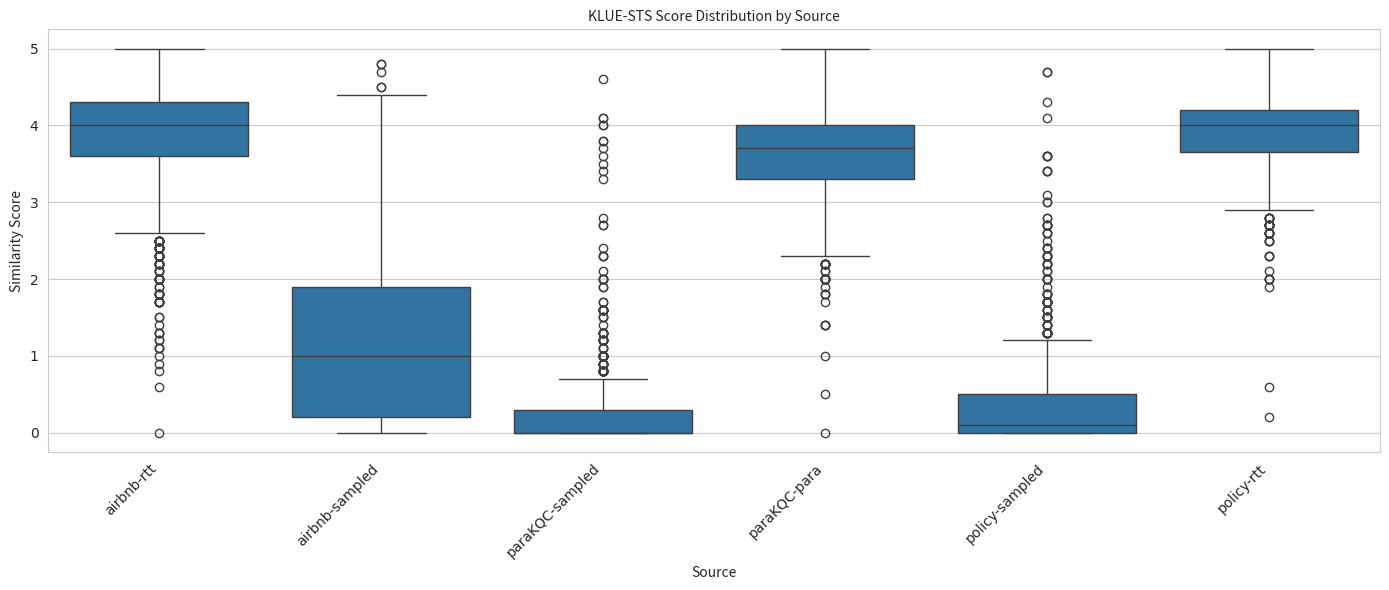

In [43]:
# 출처별 분포 시각화
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_sts_clean, x='source', y='score', order=source_stats.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Source', fontproperties=fontprop)
plt.ylabel('Similarity Score', fontproperties=fontprop)
plt.title('KLUE-STS Score Distribution by Source', fontproperties=fontprop)
plt.tight_layout()
plt.show()

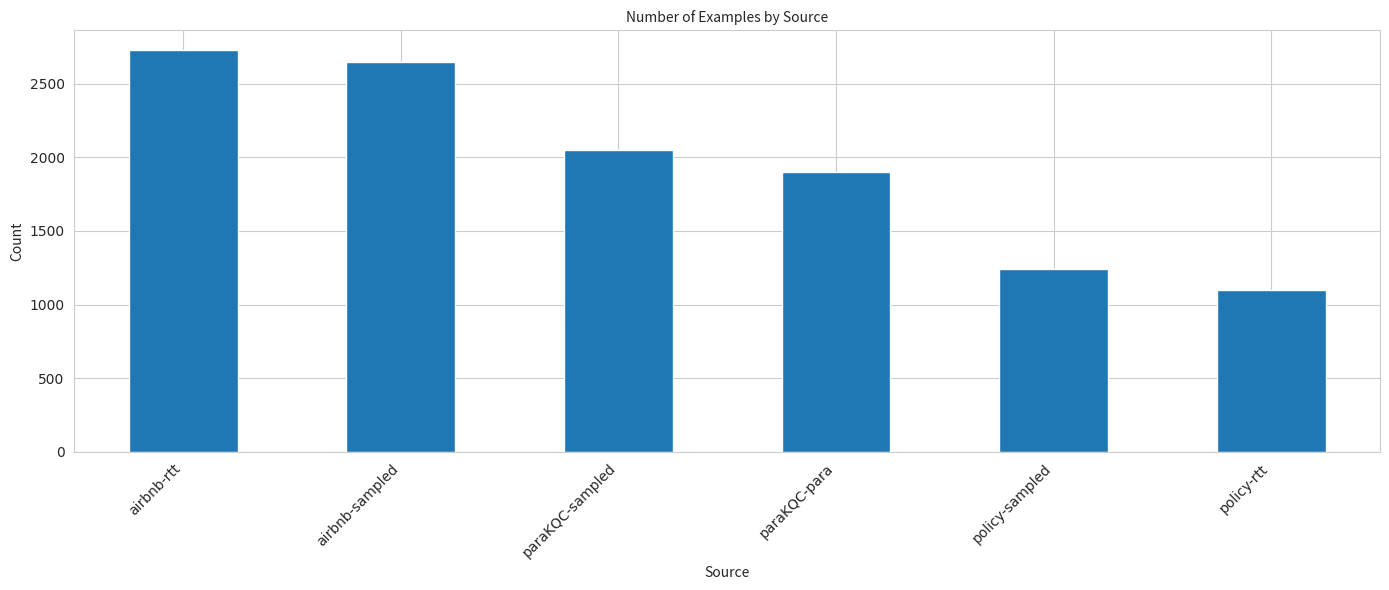

In [44]:
# 출처별 데이터 개수
plt.figure(figsize=(14, 6))
source_counts = df_sts_clean['source'].value_counts()
source_counts.plot(kind='bar')
plt.xlabel('Source', fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.title('Number of Examples by Source', fontproperties=fontprop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.5 점수 구간별 예제 살펴보기

In [45]:
# 점수 구간별 예제 추출
score_ranges = [
    (0.0, 1.0, "매우 낮음"),
    (1.0, 2.0, "낮음"),
    (2.0, 3.0, "중간"),
    (3.0, 4.0, "높음"),
    (4.0, 5.1, "매우 높음")
]

for low, high, label in score_ranges:
    print(f"\n{'='*60}")
    print(f"유사도 {label} ({low:.1f} ~ {high:.1f})")
    print('='*60)
    
    examples = df_sts_clean[(df_sts_clean['score'] >= low) & 
                            (df_sts_clean['score'] < high)].head(2)
    
    for idx, row in examples.iterrows():
        print(f"\n[점수: {row['score']:.2f}]")
        print(f"문장1: {row['sentence1']}")
        print(f"문장2: {row['sentence2']}")


유사도 매우 낮음 (0.0 ~ 1.0)

[점수: 0.00]
문장1: 위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.
문장2: 시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.

[점수: 0.30]
문장1: 회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.
문장2: 사람들이 주로 네이버 메일을 쓰는 이유를 알려줘

유사도 낮음 (1.0 ~ 2.0)

[점수: 1.00]
문장1: 다만 소파 침대에 얼룩과 먼지가 조금 있었습니다
문장2: 다만, 관광지들과 거리가 조금 있습니다.

[점수: 1.30]
문장1: 앞으로 늦지 말고 회사 상사와 약속에는 먼저 나가야해.
문장2: 약속 일정 변경은 당일이 아니라 미리미리 얘기하도록 하세요.

유사도 중간 (2.0 ~ 3.0)

[점수: 2.70]
문장1: 그리고 숙소가 예뻐요 그냥 너무너무 예뻐요.
문장2: 그리고 무엇보다 방이 너무예쁘고 집전체가 너무너무 예뻐요.

[점수: 2.80]
문장1: 그래도 세탁기와 건조기 사용이 좋았어요
문장2: 세탁기가 완전건조 세탁기라는 게 가장 좋았어요.

유사도 높음 (3.0 ~ 4.0)

[점수: 3.70]
문장1: 숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.
문장2: 숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.

[점수: 3.80]
문장1: 신주쿠에서 딱 두 정거장 떨어진 히가시나카노 역에서 금방 갈 수 있구요
문장2: 신주쿠에서 두 정거장만 가면 히가시나카노 역에 도착할 수 있어요.

유사도 매우 높음 (4.0 ~ 5.1)

[점수: 4.70]
문장1: 호스트의 답장이 늦으나, 개선될 것으로 보입니다.
문장2: 호스트 응답이 늦었지만 개선될 것으로 보입니다.

[점수: 4.00]
문장1: 지하철을 타도 30분안에는 이동이 가능합니다!
문장2: 지하철을 탄다고 해도, 30분이면 그곳에 도착할 수 있어요!


## 4. KLUE-NLI (자연어 추론)

In [46]:
# KLUE-NLI 불러오기
print("KLUE-NLI 다운로드 중...")
nli = load_dataset("klue", name="nli")
print("\n다운로드 완료!")
print(nli)

KLUE-NLI 다운로드 중...

다운로드 완료!
DatasetDict({
    train: Dataset({
        features: ['guid', 'source', 'premise', 'hypothesis', 'label'],
        num_rows: 24998
    })
    validation: Dataset({
        features: ['guid', 'source', 'premise', 'hypothesis', 'label'],
        num_rows: 3000
    })
})


In [47]:
# 레이블 매핑
label_map = {
    0: '함의 (entailment)',
    1: '중립 (neutral)',
    2: '모순 (contradiction)'
}

# 각 레이블별 예제 보기
print("KLUE-NLI 예제:")
print("="*60)

for label_id in range(3):
    for example in nli["train"]:
        if example['label'] == label_id:
            print(f"\n[{label_map[label_id]}]")
            print(f"전제: {example['premise']}")
            print(f"가설: {example['hypothesis']}")
            break

KLUE-NLI 예제:

[함의 (entailment)]
전제: 힛걸 진심 최고다 그 어떤 히어로보다 멋지다
가설: 힛걸 진심 최고로 멋지다.

[중립 (neutral)]
전제: 100분간 잘껄 그래도 소닉붐땜에 2점준다
가설: 소닉붐이 정말 멋있었다.

[모순 (contradiction)]
전제: 100분간 잘껄 그래도 소닉붐땜에 2점준다
가설: 100분간 잤다.


레이블 분포:
  함의 (entailment): 8,561개
  중립 (neutral): 7,948개
  모순 (contradiction): 8,489개


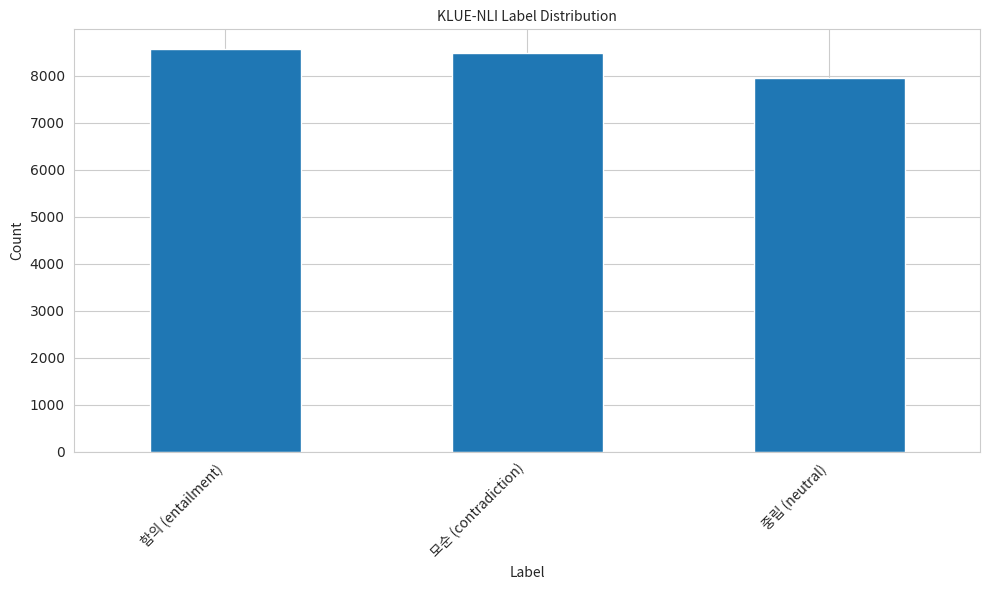

In [48]:
# 레이블 분포 확인
df_nli = nli["train"].to_pandas()

print("레이블 분포:")
label_counts = df_nli['label'].value_counts().sort_index()
for label_id, count in label_counts.items():
    print(f"  {label_map[label_id]}: {count:,}개")

# 시각화
plt.figure(figsize=(10, 6))
df_nli['label'].map(label_map).value_counts().plot(kind='bar')
plt.xlabel('Label', fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.title('KLUE-NLI Label Distribution', fontproperties=fontprop)
# x축 레이블에 한글 폰트 적용
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(fontprop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. KLUE-YNAT (주제 분류)

In [49]:
# KLUE-YNAT 불러오기
print("KLUE-YNAT 다운로드 중...")
ynat = load_dataset("klue", name="ynat")
print("\n다운로드 완료!")
print(ynat)

KLUE-YNAT 다운로드 중...

다운로드 완료!
DatasetDict({
    train: Dataset({
        features: ['guid', 'title', 'label', 'url', 'date'],
        num_rows: 45678
    })
    validation: Dataset({
        features: ['guid', 'title', 'label', 'url', 'date'],
        num_rows: 9107
    })
})


In [50]:
# 주제 레이블 매핑
topic_map = {
    0: '정치',
    1: '경제',
    2: '사회',
    3: '생활문화',
    4: '세계',
    5: 'IT과학',
    6: '스포츠'
}

# 각 주제별 예제 보기
print("주제별 뉴스 헤드라인 예제:")
print("="*60)

for topic_id in range(7):
    for example in ynat["train"]:
        if example['label'] == topic_id:
            print(f"\n[{topic_map[topic_id]}]")
            print(f"  {example['title']}")
            break

주제별 뉴스 헤드라인 예제:

[정치]
  야외서 생방송 하세요…액션캠 전용 요금제 잇따라

[경제]
  LGU＋ 1분기 영업익 1천706억원…마케팅 비용 감소종합

[사회]
  내년부터 국가RD 평가 때 논문건수는 반영 않는다

[생활문화]
  유튜브 내달 2일까지 크리에이터 지원 공간 운영

[세계]
  왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보

[IT과학]
  월드컵 태극전사 16강 전초기지 레오강 입성종합

[스포츠]
  정진석 이정현 당현실 냉정하게 봐야…물러나는게 좋다종합


주제별 데이터 개수:
  정치: 5,235개
  경제: 6,118개
  사회: 5,133개
  생활문화: 5,751개
  세계: 8,320개
  IT과학: 7,742개
  스포츠: 7,379개


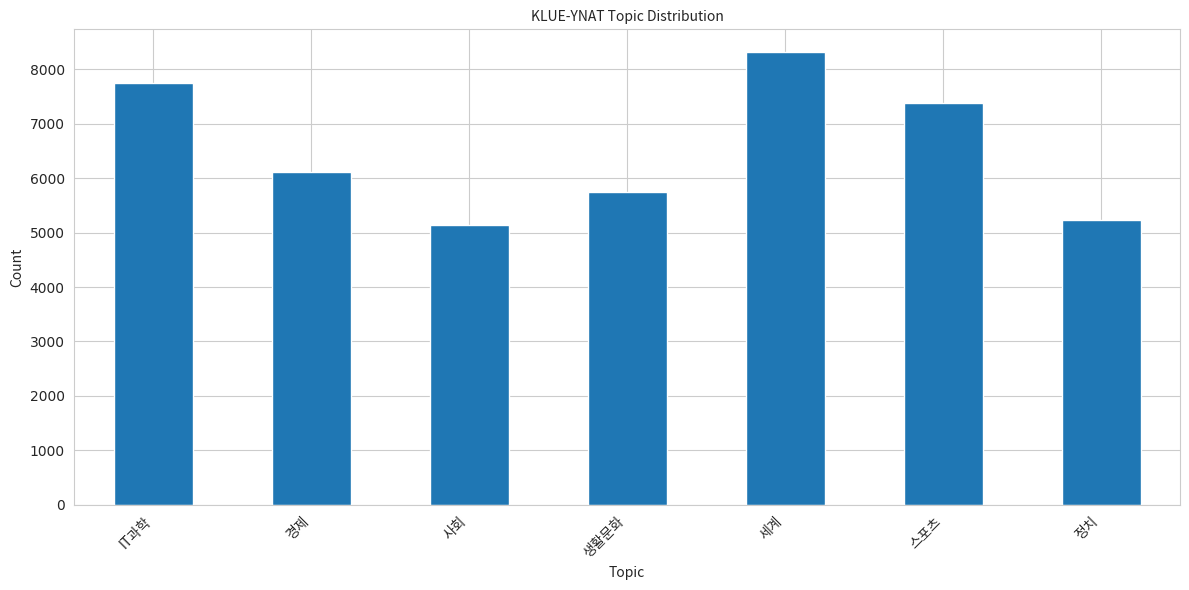

In [51]:
# 주제별 분포 확인
df_ynat = ynat["train"].to_pandas()

print("주제별 데이터 개수:")
topic_counts = df_ynat['label'].value_counts().sort_index()
for topic_id, count in topic_counts.items():
    print(f"  {topic_map[topic_id]}: {count:,}개")

# 시각화
plt.figure(figsize=(12, 6))
df_ynat['label'].map(topic_map).value_counts().sort_index().plot(kind='bar')
plt.xlabel('Topic', fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.title('KLUE-YNAT Topic Distribution', fontproperties=fontprop)
# x축 레이블에 한글 폰트 적용
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(fontprop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. 데이터셋 비교

데이터셋 크기 비교 (학습 데이터):
  KLUE-STS: 11,668개
  KLUE-NLI: 24,998개
  KLUE-YNAT: 45,678개


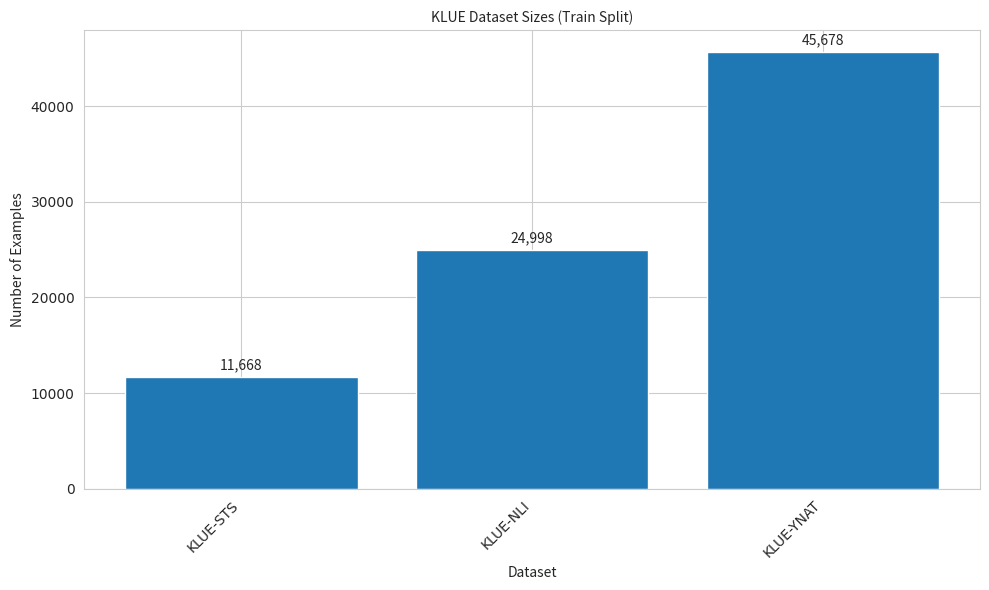

In [52]:
# 데이터셋 크기 비교
dataset_sizes = {
    'KLUE-STS': len(sts['train']),
    'KLUE-NLI': len(nli['train']),
    'KLUE-YNAT': len(ynat['train'])
}

print("데이터셋 크기 비교 (학습 데이터):")
for name, size in dataset_sizes.items():
    print(f"  {name}: {size:,}개")

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(dataset_sizes.keys(), dataset_sizes.values())
plt.xlabel('Dataset', fontproperties=fontprop)
plt.ylabel('Number of Examples', fontproperties=fontprop)
plt.title('KLUE Dataset Sizes (Train Split)', fontproperties=fontprop)
plt.xticks(rotation=45, ha='right')

for i, (name, size) in enumerate(dataset_sizes.items()):
    plt.text(i, size + 500, f'{size:,}', ha='center', va='bottom', fontproperties=fontprop)

plt.tight_layout()
plt.show()

## 7. 정리

### 오늘 배운 내용

1. **데이터 로딩 방법**
   - GitHub에서 직접 다운로드: 오래된 데이터셋(NSMC)
   - HuggingFace `load_dataset()`: 최신 데이터셋(KLUE)
   - 자동 다운로드 및 캐싱

2. **KLUE 벤치마크**
   - KLUE-STS: 의미적 텍스트 유사도
   - KLUE-NLI: 자연어 추론
   - KLUE-YNAT: 주제 분류

3. **데이터 분석**
   - Pandas DataFrame 변환 및 분석
   - 기본 통계 및 시각화
   - 출처별/레이블별 비교

### 기말 프로젝트 아이디어

- KLUE-STS를 활용한 패러프레이즈 탐지
- KLUE-NLI를 활용한 논리적 일관성 검사
- KLUE-YNAT을 활용한 뉴스 주제 자동 분류
- 여러 KLUE 태스크 성능 비교 분석

### 참고 자료

- HuggingFace Datasets: https://huggingface.co/docs/datasets/
- KLUE 논문: https://arxiv.org/abs/2105.09680
- KLUE 웹사이트: https://klue-benchmark.com/
- NSMC GitHub: https://github.com/e9t/nsmc